# Day 9: Risk Mangement & Performance Issues

## Risk Management
* Risk engineering: https://risk-engineering.org/
    * Risk metrics: https://risk-engineering.org/static/PDF/slides-risk-metrics.pdf
* References:
    * Tim Bollerslev  Benjamin Hood  John Huss  Lasse Heje Pedersen, "Risk Everywhere: Modeling and Managing Volatility," *The Review of Financial Studies*, Volume 31, Issue 7, July 2018, Pages 2729–2773: https://academic.oup.com/rfs/article/31/7/2729/5001472
    * [Are Hedge Funds Simply too Risky?
An Investor’s Perspective](http://www.garp.org/newmedia/presentations/AreHedgeFundsSimplyTooRiskAnInvestorsPerspective_NilsTuchschmid_050815.pdf) by Nils S. Tuchschmid , 2015
    * [用數學計算日馳何時崩盤！](https://www.finlab.tw/%E7%94%A8%E6%95%B8%E5%AD%B8%E8%A8%88%E7%AE%97%E6%97%A5%E9%A6%B3%E4%BD%95%E6%99%82%E5%B4%A9%E7%9B%A4%EF%BC%81/) by FinLab

### Value at Risk (VaR)
* Estimating Value at Risk: https://risk-engineering.org/static/PDF/slides-VaR.pdf by Eric Marsden
    * Basel III: https://en.wikipedia.org/wiki/Basel_III
* References:
    * Gabor Nguyen: http://andras.niedermayer.ch/wp-content/uploads/2018/04/Python_for_Finance_Lecture_6.pdf
    * Lecture notes on risk management, public policy, and the financial system - Value-at-Risk: http://www.columbia.edu/~amm26/lecture%20files/VaR.pdf by Allan M. Malz
    * Financial Risk Management by 台大國企系王之彥老師：
        * [Market-Risk Measurement](http://homepage.ntu.edu.tw/~jryanwang/course/Financial%20Risk%20Management%20(undergraduate%20level)/FRM_Ch05.pdf)
        * [The Three Common Approaches for
    Calculating Value at Risk](http://homepage.ntu.edu.tw/~jryanwang/course/Financial%20Risk%20Management%20(undergraduate%20level)/FRM_Ch06.pdf)
        * [Value-at-Risk Contribution](http://homepage.ntu.edu.tw/~jryanwang/course/Financial%20Risk%20Management%20(undergraduate%20level)/FRM_Ch07.pdf)
        * [Testing VaR Results to Ensure Proper Risk Measurement](http://homepage.ntu.edu.tw/~jryanwang/course/Financial%20Risk%20Management%20(undergraduate%20level)/FRM_Ch08.pdf)
        * [Calculating Capital for Market Risk](http://homepage.ntu.edu.tw/~jryanwang/course/Financial%20Risk%20Management%20(undergraduate%20level)/FRM_Ch09.pdf)
        * [The Management of Market Risk](http://homepage.ntu.edu.tw/~jryanwang/course/Financial%20Risk%20Management%20(undergraduate%20level)/FRM_Ch11.pdf)

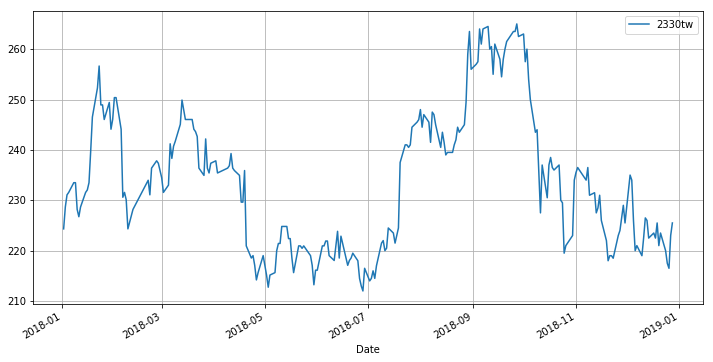

In [5]:
import ffn
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True

prices = ffn.get('2330.TW', start = "2018-1-1", end = "2018-12-31")
prices.plot(figsize = (12, 6))

In [6]:
return_rates = prices.pct_change().dropna() * 100
return_rates.head()

2330tw
Date                
2018-01-03  1.935488
2018-01-04  1.054848
2018-01-05  0.208770
2018-01-08  0.833334
2018-01-09  0.000000

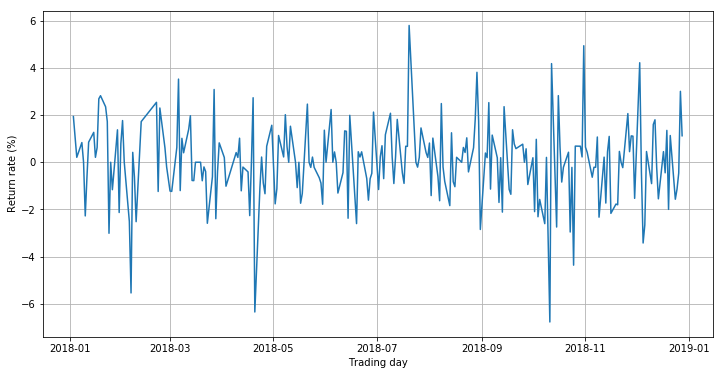

In [7]:
plt.figure(figsize = (12, 6))
plt.plot(return_rates)
plt.xlabel('Trading day')
plt.ylabel('Return rate (%)')
plt.show()

### Descriptive Statistics: First 4 Moments
* Skewness: https://en.wikipedia.org/wiki/Skewness
    * Skewness of normal distribution = 0
* Kurtosis: https://en.wikipedia.org/wiki/Kurtosis
    * Kurtosis of normal distribution = 3


In [8]:
print("mean : ", np.mean(return_rates.values))
print("var  : ", np.var(return_rates.values))
print("skew : ", scipy.stats.skew(return_rates.values)[0])
print("kurt : ", scipy.stats.kurtosis(return_rates.values)[0])

mean :  0.01622388469222048
var  :  2.805422498657526
skew :  -0.30151296064079786
kurt :  2.0978160179093255


### QQ Plot

((array([-2.7660794 , -2.46319801, -2.29114787, -2.16825434, -2.07137443,
         -1.99075074, -1.9213089 , -1.86005848, -1.80508277, -1.75507658,
         -1.70910939, -1.66649348, -1.62670558, -1.58933792, -1.55406631,
         -1.52062855, -1.48880944, -1.45843008, -1.42934008, -1.40141172,
         -1.37453559, -1.34861722, -1.32357442, -1.29933525, -1.27583633,
         -1.25302156, -1.230841  , -1.20924999, -1.18820845, -1.16768023,
         -1.14763264, -1.12803597, -1.10886319, -1.09008958, -1.07169252,
         -1.0536512 , -1.03594646, -1.01856064, -1.00147737, -0.98468148,
         -0.96815887, -0.95189643, -0.93588192, -0.9201039 , -0.90455168,
         -0.88921522, -0.87408512, -0.85915251, -0.84440907, -0.82984693,
         -0.81545867, -0.80123728, -0.78717613, -0.77326892, -0.75950968,
         -0.74589275, -0.73241275, -0.71906453, -0.70584322, -0.69274417,
         -0.67976291, -0.66689521, -0.65413699, -0.64148438, -0.62893363,
         -0.61648119, -0.60412361, -0.

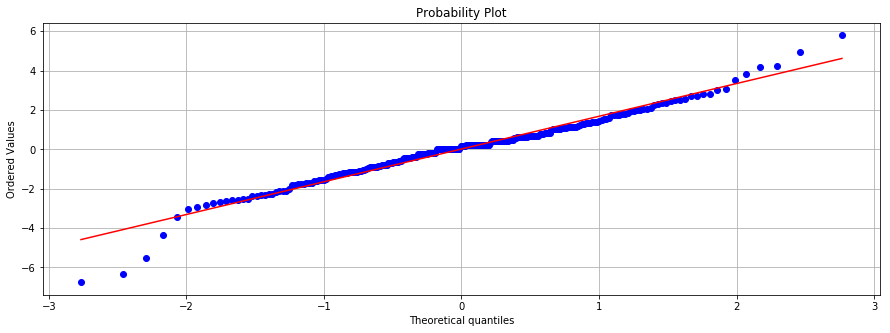

In [9]:
scipy.stats.probplot(return_rates.values[:, 0], dist = scipy.stats.norm, plot = plt.figure(figsize = (15, 5)).add_subplot(111))

### Jarque-Bera Test
* The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
    * $H_0$: joint hypothesis of the skewness being zero and the excess kurtosis being zero.

In [10]:
_, pvalue = scipy.stats.jarque_bera(return_rates)
print(pvalue) # not a normal distribution

3.031430662048251e-11


### Historical VaR

In [12]:
VaR_90 = return_rates.quantile(0.1).values[0]
VaR_95 = return_rates.quantile(0.05).values[0]
VaR_99 = return_rates.quantile(0.01).values[0]
VaR_999 = return_rates.quantile(0.001).values[0]

h_VaR = {'90%': VaR_90, '95%': VaR_95, '99%': VaR_99, '99.9%': VaR_999}
table = pd.DataFrame.from_dict(h_VaR, orient = 'index')
table.head()

0
90%   -2.062548
95%   -2.574181
99%   -5.027788
99.9% -6.659548

In [13]:
var_t = np.percentile(return_rates, 5)
print(var_t)

-2.574181388040521


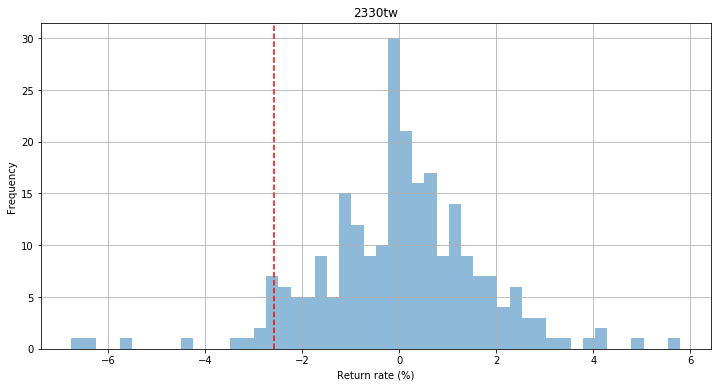

Max loss with 95% probability is less than 2.57% in single day.


In [14]:
return_rates.hist(figsize = (12, 6), bins = 50, alpha = 0.5, grid = True)
plt.axvline(x = var_t, color = 'r', linestyle = '--', label = "95% CI of VaR: {0:.2f}%".format(var_t))
plt.xlabel('Return rate (%)')
plt.ylabel('Frequency')
plt.show()

print ("Max loss with 95% probability is less than {0:.2f}% in single day.".format(-var_t))

### Fitting to the Student’s t Distribution

In [16]:
import scipy.stats

mean = return_rates.mean()
sigma = return_rates.std()
tdf, tmean, tsigma = scipy.stats.t.fit(return_rates)
print(tdf, tmean, tsigma)

4.982798049144861 0.046036792694313856 1.309839525917086


Text(0.5,0,'Return rate (%)')

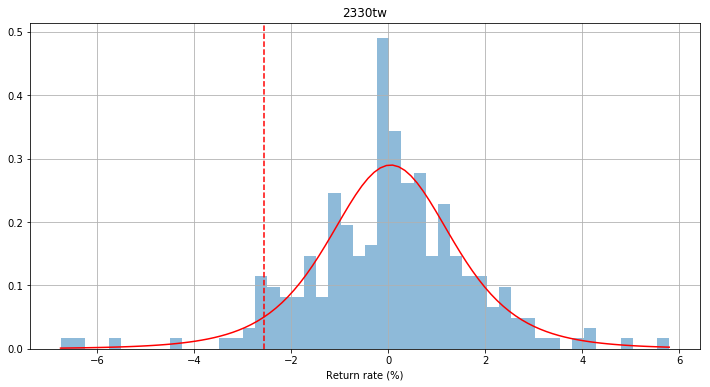

In [17]:
support = np.linspace(return_rates.min(), return_rates.max(), 100)

return_rates.hist(figsize = (12, 6), bins = 50, alpha = 0.5, density = True, grid = True)
plt.axvline(x = var_t, color = 'r', linestyle = '--', label = "95% CI of VaR: {0:.2f}%".format(var_t))
plt.plot(support, scipy.stats.t.pdf(support, loc = tmean, scale = tsigma, df = tdf), "r-")
plt.xlabel("Return rate (%)")

In [18]:
var = scipy.stats.t.ppf(0.05, loc = tmean, scale = tsigma, df = tdf)

print ("Max loss with 95% probability is less than {0:.2f}% in single day.".format(-var))

Max loss with 95% probability is less than 2.60% in single day.


### Delta Hedging
* Sensitivity analysis of options: https://www.csie.ntu.edu.tw/~lyuu/finance1/2018/20180411.pdf (starting from p. 327)
    * Greeks: https://en.wikipedia.org/wiki/Greeks_(finance)#Formulas_for_European_option_Greeks
* Delta hedge: https://www.csie.ntu.edu.tw/~lyuu/finance1/2019/20190424.pdf (starting from pp. 671-685)
* Pricing on American options by MC simulation: https://www.csie.ntu.edu.tw/~lyuu/finance1/2018/20180523.pdf (starting from p.878)
* References:
    * https://github.com/yhilpisch/dawp/tree/master/python36/13_dyh
    * Option payoffs, Black-Scholes and the Greeks: https://clinthoward.github.io/portfolio/2017/04/16/BlackScholesGreeks/ by  Clint Howard, 2017.4.16
    * Delta hedging: https://maths.ucd.ie/~vlasenko/MST30030/fm16.pdf
    * https://brilliant.org/wiki/option-greeks-delta/
    * http://www.pricederivatives.com/en/simple-example-simulation-of-delta-hedging-with-python/

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt

S0 = 100.0   # initial stock value
K = 95.0     # strike price
T = 1.0      # time to maturity
r = 0.05     # risk-less short rate
sigma = 0.25  # volatility of stock value

M = 100      # number of time steps
I = 10000    # number of paths
D = 2        # degree of polynomials

In [26]:
def BSM_lsm_put_value(S0, M, I):

    np.random.seed(1)
    
    dt = T / M   # length of time interval
    
    rand = np.random.randn(M + 1, I)
    df = np.exp(-r * dt)
    S = np.zeros((M + 1, I))
    S[0] = S0
    for i in range(1, M + 1):
        S[i] = S[i - 1] * (np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand[i]))
        
    h = np.maximum(K - S, 0)          # exercise values
    put_value = np.maximum(K - S, 0)  # value matrix
    ex = np.zeros((M + 1, I))         # optimal exercise mask
    C = np.zeros((M + 1, I))          # continuation value matrix
    
    rg = np.zeros((M + 1, D + 1))     # matrix for regression coefficients
    
    for t in range(M - 1, 0, -1):
        
        rg[t] = np.polyfit(S[t], put_value[t + 1] * df, D)
        C[t] = np.polyval(rg[t], S[t])
        
        C[t] = np.where(C[t] < 0, 0.0, C[t])
        put_value[t] = np.where(h[t] >= C[t], h[t], put_value[t + 1] * df)  # exercise decision
        ex[t] = np.where(h[t] >= C[t], 1, 0)
        
    p = np.sum(put_value[1]) / I * df
    return p, S, ex, rg, h, dt

In [66]:
def BSM_hedge_run(p = 0):

    delta = np.zeros(M + 1)  # delta vector
    
    ds = 2
    p1, S, ex, rg, h, dt = BSM_lsm_put_value(S0, M, I)
    p2 = BSM_lsm_put_value(S0 + ds, M, I)[0]
    delta[0] = (p2 - p1) / ds

    print("%7s | %7s | %7s" % ('Time', 'S_t', 'Delta'))
    for t in range(1, M):
        
        if ex[t, p] == 1:
            break # exercise

        St = S[t, p]
        delta[t] = (np.polyval(rg[t], St + ds) - np.polyval(rg[t], St)) / ds
        print("{:7d} | {:7.3f} | {:7.3f}".format(t, St, delta[t]))
        if (S[t, p] - S[t - 1, p]) * (delta[t] - delta[t - 1]) < 0:
            print("------> wrong")

    po = np.zeros(t)  # vector for portfolio values
    vt = np.zeros(t)  # vector for option values
    
    print("DYNAMIC HEDGING OF AMERICAN PUT (LSM)")
    print("Time |" + 5 * " %14s|" % ('Put', 'S_t', 'Delta', 'Cash', 'NPV'))
    print("-" * 120)
    
    vt[0] = p1                  # write a put; receive put premium
    bo = vt[0] - delta[0] * S0  # total cash
    po[0] = bo - (p1 - delta[0] * S0)

    j = 0
    print("%4d |" % j + 5 * " %14.4f|" % (vt[j], S[j, p], delta[j], bo, po[0]))
    
    for j in range(1, t):
        
        vt[j] = BSM_lsm_put_value(S[j, p], M - j, I)[0]          # the current option price
        bo = bo * math.exp(r * dt) - (delta[j] - delta[j - 1]) * S[j, p]
        po[j] = bo - (vt[j] - delta[j] * S[j, p])
        
        print("%4d |" % j + 5 * " %14.4f|" % (vt[j], S[j, p], delta[j], bo, po[j]))
    
    errs = po        
    print("MSE             {:7.3f}".format(np.sum(errs ** 2) / len(errs)))
    print("Average error   {:7.3f}".format(np.sum(errs) / len(errs)))
    print("Total P&L       {:7.3f}".format(np.sum(po)))
    return S[:, p], po, vt, errs, t

In [67]:
def plot_hedge_path(S, po, vt, errs, t):

    tl = np.arange(t)
    
    plt.figure(figsize = (12, 6))
    
    plt.subplot(311)
    plt.plot(tl, S[tl], 'r')
    full_range = np.arange(M - t) + t
    plt.plot(full_range, S[full_range], 'r--')
    plt.ylabel('Price of underlying asset')
    ax = plt.axis()
    
    plt.subplot(312)
    plt.plot(tl, po[tl], '-.', color = "goldenrod", label = 'Portfolio value', lw = 2)
    plt.plot(tl, vt[tl], 'b', label = 'Option value', lw = 1)
    plt.ylabel('Value')
    plt.legend()
    plt.xlim([ax[0], ax[1]])
    
    plt.subplot(313)
    diffs = po[tl] - vt[tl]
    plt.bar(tl - 1 / 2, diffs, color = 'b')
    plt.ylabel('Tracking error')
    plt.xlabel('Time step')
    plt.xlim([ax[0], ax[1]])
    plt.tight_layout()

   Time |     S_t |   Delta
      1 | 100.735 |  -0.290
      2 | 101.358 |  -0.320
------> wrong
      3 | 103.696 |  -0.257
      4 | 105.947 |  -0.225
      5 | 107.384 |  -0.203
      6 | 106.938 |  -0.224
      7 | 106.173 |  -0.234
      8 | 103.897 |  -0.278
      9 | 101.631 |  -0.314
     10 |  97.187 |  -0.381
     11 |  91.663 |  -0.456
     12 |  92.231 |  -0.447
     13 |  93.762 |  -0.436
     14 |  95.164 |  -0.416
     15 |  96.327 |  -0.398
     16 |  94.718 |  -0.422
     17 |  91.858 |  -0.464
     18 |  95.200 |  -0.421
     19 |  97.820 |  -0.385
     20 |  95.188 |  -0.426
     21 |  91.761 |  -0.476
     22 |  92.654 |  -0.463
     23 |  94.377 |  -0.438
     24 |  92.293 |  -0.471
     25 |  94.630 |  -0.436
     26 |  91.076 |  -0.489
     27 |  90.621 |  -0.496
     28 |  88.660 |  -0.526
     29 |  89.129 |  -0.523
     30 |  83.091 |  -0.612
     31 |  85.182 |  -0.579
     32 |  84.483 |  -0.586
     33 |  87.939 |  -0.542
     34 |  86.796 |  -0.560
     3

  67 |         5.7627|        98.5092|        -0.4076|        44.4594|        -1.4508|
  68 |         5.9586|        97.9946|        -0.4127|        44.9844|        -1.4147|
  69 |         6.2978|        97.1569|        -0.4225|        45.9581|        -1.3857|
  70 |         6.5775|        96.3737|        -0.4312|        46.8217|        -1.3115|
  71 |         7.8842|        93.3263|        -0.4641|        49.9197|        -1.2808|
  72 |         7.3874|        94.5268|        -0.4517|        48.7717|        -1.3162|
  73 |         7.5460|        94.0945|        -0.4548|        49.0881|        -1.2551|
  74 |         5.9345|        98.1610|        -0.4110|        44.8141|        -1.4687|
  75 |         6.0163|        97.8983|        -0.4148|        45.2051|        -1.4202|
  76 |         5.3875|        99.7236|        -0.3955|        43.3004|        -1.5258|
  77 |         5.4641|        99.5677|        -0.3973|        43.5060|        -1.5191|
  78 |         4.7775|       101.8322|     

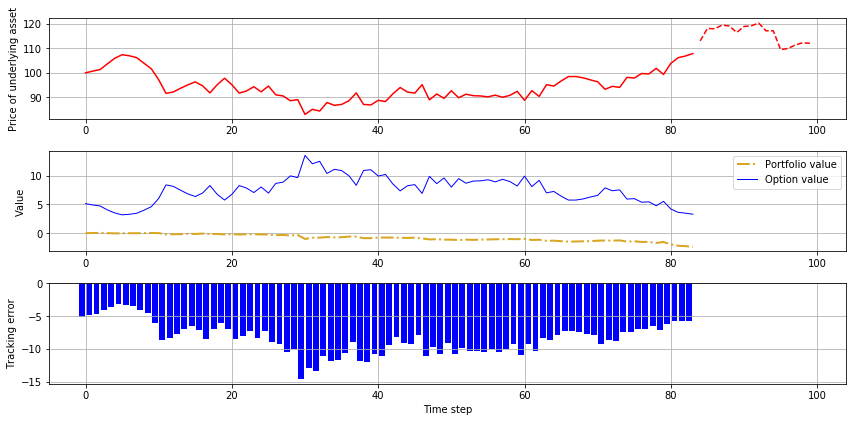

In [68]:
output = BSM_hedge_run(p = 50)
S, po, vt, errs, t = output
plot_hedge_path(S, po, vt, errs, t)

## Performance Issues
* Notebook: https://github.com/yhilpisch/py4fi/blob/master/jupyter36/08_Performance_Python.ipynb
* References:
    * Row major or column major?: https://docs.scipy.org/doc/numpy-1.10.0/glossary.html
    * Numba documentation: http://numba.pydata.org/numba-doc/0.39.0/index.html
    * The basics of cython: https://cython.readthedocs.io/en/latest/src/tutorial/cython_tutorial.html

### Concurrent Programming in Python
* Slides: https://python.g-node.org/python-summerschool-2011/_media/parallel-slides.pdf
* Amdahl's law: https://en.wikipedia.org/wiki/Amdahl%27s_law
* Multiprocessing and multithreading: why not multithreading: https://www.ploggingdev.com/2017/01/multiprocessing-and-multithreading-in-python-3/
* References:
    * Multiprocessing: process-based parallelism: https://docs.python.org/3/library/multiprocessing.html
    * Global interpreter lock: https://wiki.python.org/moin/GlobalInterpreterLock

### Python feat. Excel
* Notebook: https://github.com/yhilpisch/py4fi/blob/master/jupyter36/12_Excel_Integration.ipynb